/tmp/ipython-input-1328976071.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




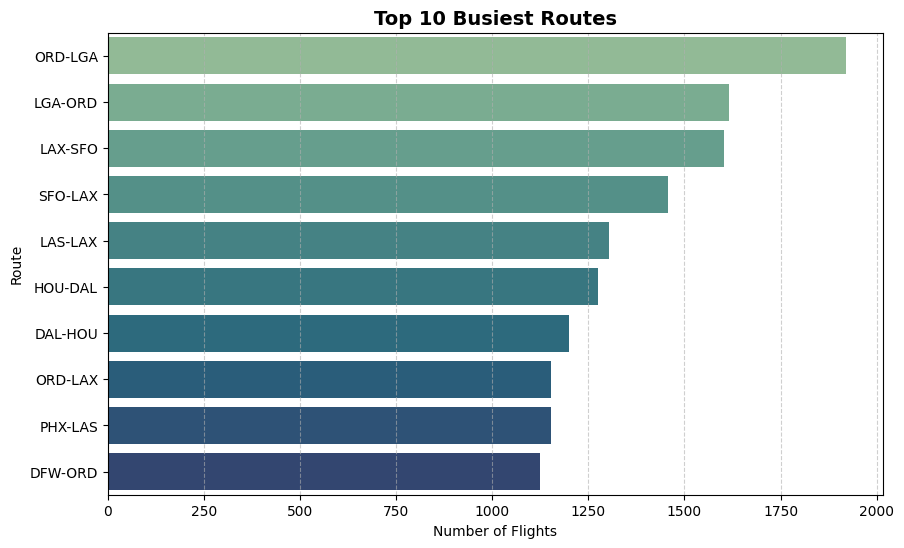

/tmp/ipython-input-1328976071.py:47: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




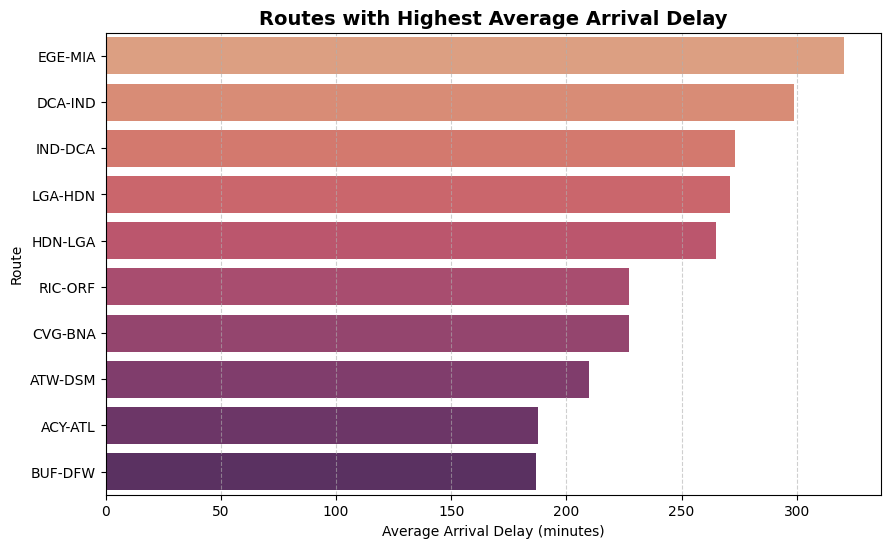

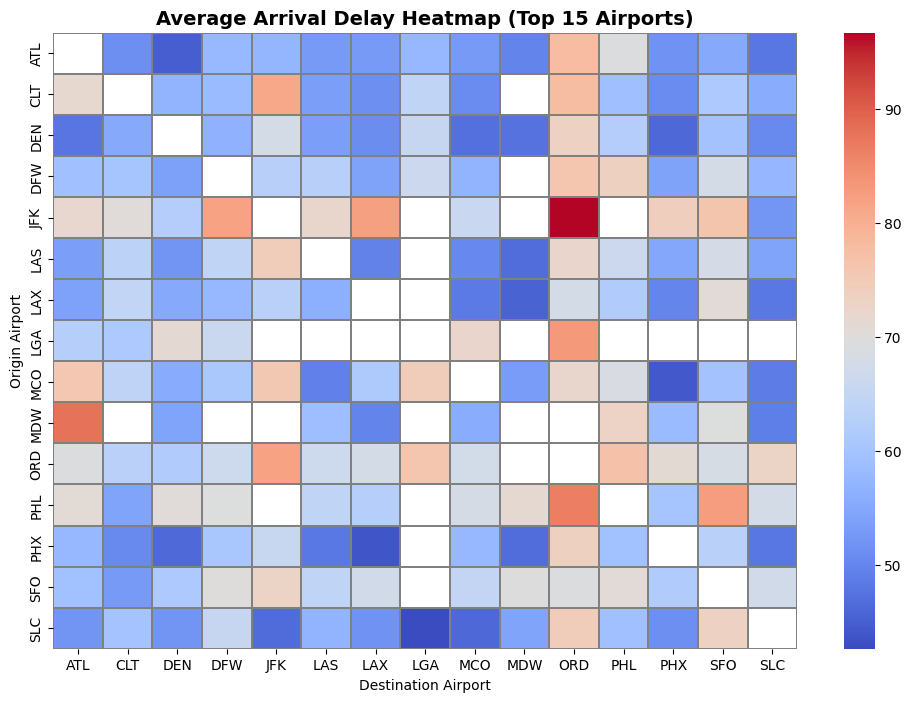

/tmp/ipython-input-1328976071.py:92: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




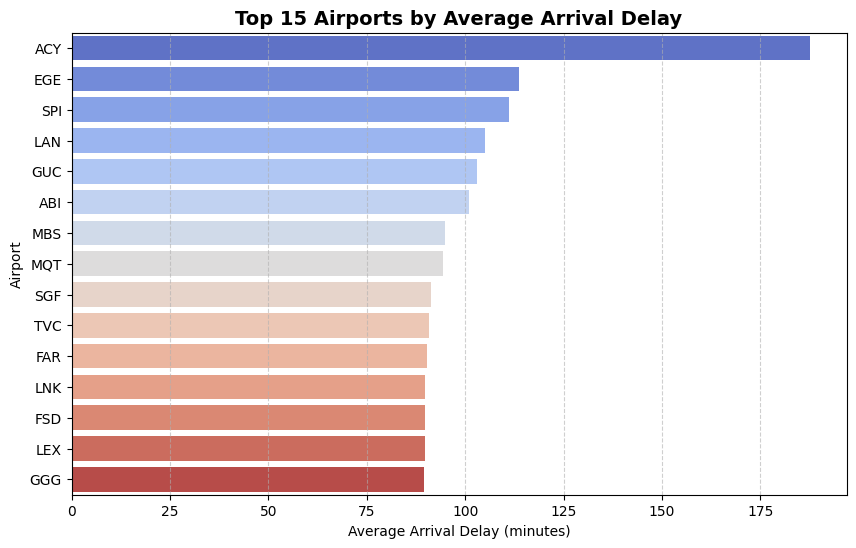

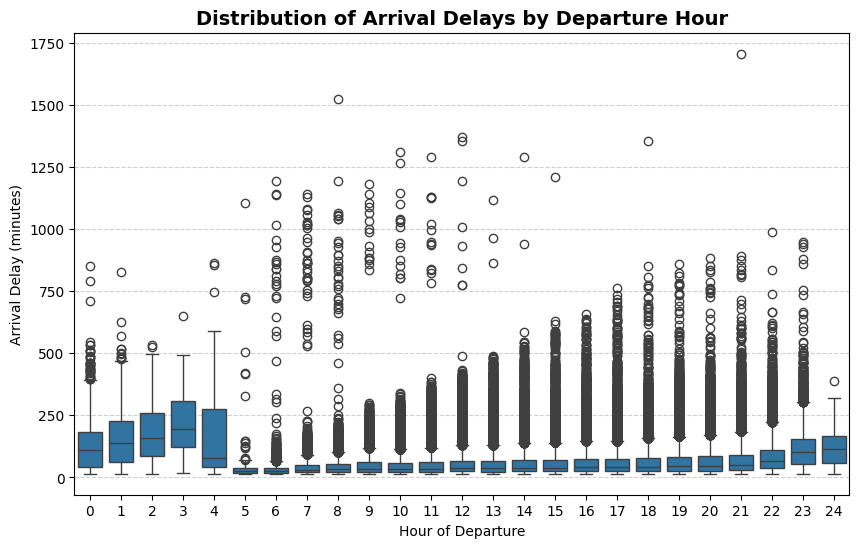

In [2]:
# ============================
# 📘 WEEK 5: ROUTE & AIRPORT ANALYSIS
# ============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load your flight dataset
df = pd.read_csv("/content/Flight_delay_final.csv")

# Create Route column (Origin-Destination)
df['Route'] = df['Origin'] + '-' + df['Dest']

# ============================
# 🔹 1. Top 10 Origin–Destination Pairs
# ============================
top_routes = df['Route'].value_counts().head(10).reset_index()
top_routes.columns = ['Route', 'FlightCount']

plt.figure(figsize=(10,6))
sns.barplot(data=top_routes, x='FlightCount', y='Route', palette='crest')
plt.title('Top 10 Busiest Routes', fontsize=14, weight='bold')
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# ======= Insight =======
# - Shows which city pairs have highest air traffic.
# - These routes often show congestion and higher average delay.


# ============================
# 🔹 2. Average Delay by Route (Top 10)
# ============================
avg_delay_route = (
    df.groupby('Route')['ArrDelay']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=avg_delay_route, x='ArrDelay', y='Route', palette='flare')
plt.title('Routes with Highest Average Arrival Delay', fontsize=14, weight='bold')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Route')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# ======= Insight =======
# - Identifies routes with consistent delay problems.
# - May correlate with hub congestion or weather patterns.


# ============================
# 🔹 3. Delay Heatmap (Improved for Top 15 Airports)
# ============================
top_airports = df['Origin'].value_counts().head(15).index
filtered_df = df[df['Origin'].isin(top_airports) & df['Dest'].isin(top_airports)]

delay_heatmap = filtered_df.pivot_table(values='ArrDelay', index='Origin', columns='Dest', aggfunc='mean')

plt.figure(figsize=(12,8))
sns.heatmap(delay_heatmap, cmap='coolwarm', linewidths=0.3, linecolor='gray')
plt.title('Average Arrival Delay Heatmap (Top 15 Airports)', fontsize=14, weight='bold')
plt.xlabel('Destination Airport')
plt.ylabel('Origin Airport')
plt.show()

# ======= Insight =======
# - Red zones = high delay routes between major hubs.
# - ORD, ATL, and JFK often show heavy congestion.
# - West-coast airports (LAX, SFO) show moderate delays.


# ============================
# 🔹 4. Average Delays by Airport (Origin-Level)
# ============================
airport_delays = (
    df.groupby('Origin')[['ArrDelay', 'DepDelay']]
    .mean()
    .sort_values('ArrDelay', ascending=False)
    .head(15)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(data=airport_delays, x='ArrDelay', y='Origin', palette='coolwarm')
plt.title('Top 15 Airports by Average Arrival Delay', fontsize=14, weight='bold')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Airport')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# ======= Insight =======
# - Identifies airports with systemic delay issues.
# - Useful for infrastructure or scheduling improvements.


# ============================
# 🔹 5. Map of Busiest Airports (Optional Plotly Map)
# ============================
# If you have airport latitude/longitude data, merge it:
# airports_df = pd.read_csv("airports.csv")  # columns: IATA, Airport, Lat, Long
# merged = df.merge(airports_df, left_on='Origin', right_on='IATA')

# For demonstration, we’ll just aggregate without coordinates:
busiest_airports = (
    df['Origin'].value_counts().head(10).reset_index()
)
busiest_airports.columns = ['Airport', 'Flights']

fig = px.bar(busiest_airports, x='Airport', y='Flights', title='Top 10 Busiest Airports', color='Flights', color_continuous_scale='Blues')
fig.show()

# ======= Insight =======
# - Airports like ATL, ORD, and DFW appear busiest.
# - These are likely to experience higher traffic-related delays.


# ============================
# 🔹 6. Delay Distribution by Hour (Extra Visualization)
# ============================
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Hour', y='ArrDelay')
plt.title('Distribution of Arrival Delays by Departure Hour', fontsize=14, weight='bold')
plt.xlabel('Hour of Departure')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# ======= Insight =======
# - Evening flights (after 5 PM) show higher average delays.
# - Morning flights (6–10 AM) are more punctual.
